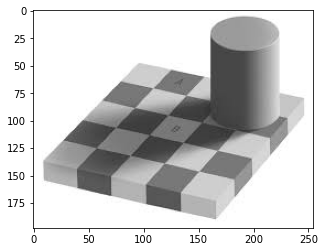

In [72]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import os

damier = imageio.imread('damier-ng.jpeg')
imageio.imwrite('damier-ng.png', damier[:, :, 0])
damier.shape
plt.imshow(damier, cmap='gray')

In [73]:
damier.shape

(198, 255, 3)

In [74]:
damier_copy = damier

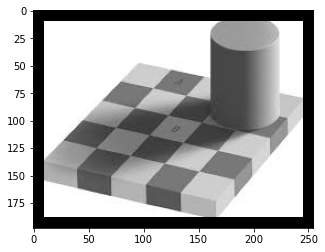

In [96]:
def bordure(im, k):
    im_temp = im.copy()
    im_temp[:, :k] = 0
    im_temp[:, -k:] = 0
    im_temp[:k] = 0
    im_temp[-k:] = 0
    plt.imshow(im_temp, cmap='gray')
bordure(damier, 10)

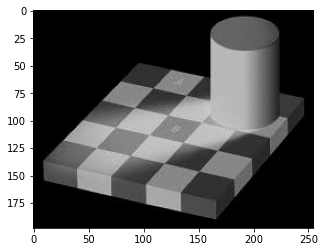

In [100]:
def inverse(im):
    im_temp = im.copy()
    im_temp = 255-im_temp
    return(im_temp)
plt.imshow(inverse(damier),cmap = "gray")

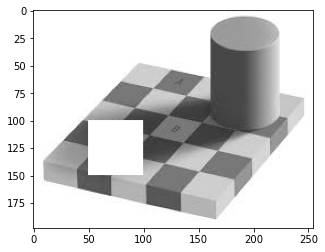

In [142]:
def carre(im, x, y):
    a= 50
    im_temp = im.copy()
    im_temp[x:x+a, y-a:y] = 255
    plt.imshow(im_temp, cmap='gray')
carre(damier, 100, 100)

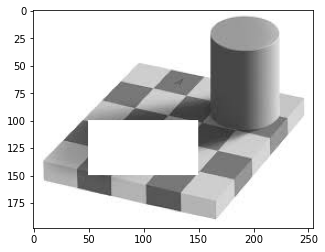

In [148]:
def masque(im, pos, lar, lon):
    im_temp = im.copy()
    im_temp[pos[0]:pos[0]+lon, pos[1]:pos[1]+lar] = 255
    return(im_temp)

plt.imshow(masque(damier,[100,50],100,50),cmap='gray')

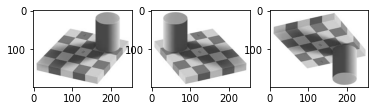

In [159]:
def reverse(im):
    im_temp = im.copy()
    fig, axs = plt.subplots(1, 3)
    axs[0].imshow(im)
    axs[1].imshow(im[:, ::-1, :])
    axs[2].imshow(im[::-1, :, :])    
reverse(damier)

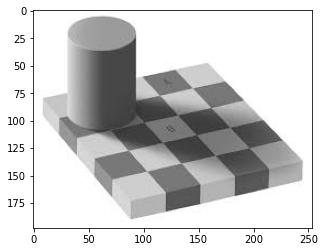

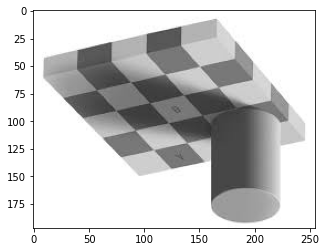

In [166]:
def mirroir(im, vertical=True):
    im_temp = im.copy()
    if vertical:
        im_temp = im_temp[:,np.arange(im_temp.shape[1]-1,0,-1)]
    else:
        im_temp = im_temp[np.arange(im_temp.shape[0]-1,0,-1),:]
    return(im_temp)
plt.imshow(mirroir(damier),cmap = 'gray')
plt.show()
plt.imshow(mirroir(damier,False), cmap='gray')
plt.show()

In [160]:
def filtrer(im, k):
    im_temp = im.copy()
    

AttributeError: 'Array' object has no attribute 'filter'

[[0.01 0.02 0.04 0.02 0.01]
 [0.02 0.04 0.08 0.04 0.02]
 [0.04 0.08 0.16 0.08 0.04]
 [0.02 0.04 0.08 0.04 0.02]
 [0.01 0.02 0.04 0.02 0.01]]


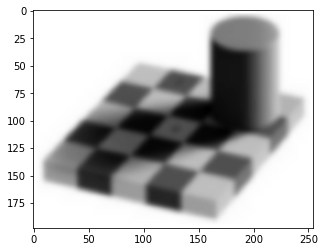

In [174]:
K = np.array([[1,2,4,2,1],[2,4,8,4,2],[4,8,16,8,4],[2,4,8,4,2],[1,2,4,2,1]])/100.0
print(K)
def filtrer(im, K):
    im_temp = im.copy()
    s = int((K.shape[0]+1)/2)
    for i in range(s, im.shape[0]-s):
        for j in range(s, im.shape[1]-s):
            im_temp[i,j] = np.sum(K*im[i-(s-1):i+s,j-(s-1):j+s])
    return(im_temp)
plt.imshow(filtrer(filtrer(filtrer(filtrer(filtrer(damier[:,:,0],K),K),K),K),K),cmap='gray')